In [1]:
cd ..

/Users/annierumbles/Desktop/Coding/galvanize/third_capstone_live


In [2]:
import random, json, re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from src.stopwords_class import StopWords
from src.nlp_pipeline import *
from src.cleaning import json_to_pandas, get_review_corpus, make_corpus_df, get_top_words_tf, nmf_topic_modeling, make_reviews_df

random.seed(9)
plt.style.use('ggplot')

In [3]:
stop = StopWords()
stop_words = stop.all_words

In [4]:
df_raw = pd.read_json('/Users/annierumbles/Dropbox/raw_colorado_hikes.json', lines=True)

In [5]:
df_raw.drop('_id', axis=1,inplace=True)

In [6]:
df_raw.set_index('name', inplace=True)

In [7]:
df_raw.head()

,url,difficulty,hike_type,avg_rating,number_ratings,location,distance,elevation,tags,main_description,secondary_description,reviews
name,,,,,,,,,,,,
Royal Arch Trail,https://www.alltrails.com/trail/us/colorado/ro...,hard,Out & Back,4.5,4119,Boulder Open Space,4.0,1492.0,dog friendly hiking nature trips snowshoeing r...,Royal Arch Trail is a 4 mile heavily trafficke...,Start on Chautauqua Trail by the ranger statio...,"{'mike_brewer': [5, 'hiking ', 'Beautiful hike..."
Chavez and Beaver Brook Trail Loop,https://www.alltrails.com/trail/us/colorado/be...,moderate,Loop,4.5,5308,Genesee Park,5.1,1105.0,dogs on leash hiking nature trips running fore...,Chavez and Beaver Brook Trail Loop is a 5.1 mi...,This trail features a nice mix of elevation ch...,"{'faz_caz': [4, 'hiking muddy rocky scramble '..."
Hanging Lake Trail [CLOSED],https://www.alltrails.com/trail/us/colorado/ha...,moderate,Out & Back,5.0,2734,White River National Forest,3.0,1135.0,kid friendly hiking nature trips bird watching...,Hanging Lake Trail is a 3 mile heavily traffi...,Users have reported this trail has a temporary...,"{'lauren_lemke': [5, 'hiking closed ', 'FYI to..."
Lost Lake via Hessie Trail,https://www.alltrails.com/trail/us/colorado/lo...,moderate,Out & Back,4.5,2063,Roosevelt National Forest,4.4,807.0,dogs on leash backpacking camping hiking snows...,Lost Lake via Hessie Trail is a 4.4 mile heavi...,,"{'david_pinto': [5, 'hiking icy muddy snow ', ..."
Mount Bierstadt Trail,https://www.alltrails.com/trail/us/colorado/mo...,hard,Out & Back,4.5,2629,Mount Evans Wilderness,6.8,2719.0,dogs on leash hiking nature trips lake river v...,Mount Bierstadt Trail is a 6.8 mile heavily tr...,The trail is almost entirely in the Mount Evan...,"{'madison_skipper': [5, 'hiking ', 'Road is to..."


In [8]:
data = df_raw['reviews']
rows = []
docs = []
for i in range(len(df_raw)):
    row_name = data.index[i]
    document = ''
    description = ''
    if data[i] is not None:
        for k, v in data[i].items():
            if type(v) == list:
                document += (v[2].strip().replace('\n', ' ').replace('\r', ' ') + ' ')
        docs.append(document)
        rows.append(row_name)
    else:
        docs.append(document)
        rows.append(row_name)


In [9]:
df_reviews = make_reviews_df(rows, docs)
df_reviews.head()

,reviews
Royal Arch Trail,Beautiful hike - be sure to get there early as...
Chavez and Beaver Brook Trail Loop,"Good trail, but for first timers it can get a ..."
Hanging Lake Trail [CLOSED],"FYI to all the hopeful hikers: ""PERMITS TO HIK..."
Lost Lake via Hessie Trail,Great trail! Do be aware towards the last ha...
Mount Bierstadt Trail,Road is totally closed! Theres no way up! Did ...


In [10]:
descs = df_raw['main_description']
descs

name
Royal Arch Trail                                 Royal Arch Trail is a 4 mile heavily trafficke...
Chavez and Beaver Brook Trail Loop               Chavez and Beaver Brook Trail Loop is a 5.1 mi...
Hanging Lake Trail  [CLOSED]                     Hanging Lake Trail  is a 3 mile heavily traffi...
Lost Lake via Hessie Trail                       Lost Lake via Hessie Trail is a 4.4 mile heavi...
Mount Bierstadt Trail                            Mount Bierstadt Trail is a 6.8 mile heavily tr...
                                                                       ...                        
Flat Irons North and Prairie Vista Loop Trail    Flat Irons North and Prairie Vista Loop Trail ...
Bear Creek to Bruin Bluff and Creekside Trail    Bear Creek to Bruin Bluff and Creekside Trail ...
Poudre Trail                                     Poudre Trail  is a 3.9 mile moderately traffic...
Homestead, Silver Fox, and Ponderosa Loop        Homestead, Silver Fox, and Ponderosa Loop is a...
Two B

In [11]:
df_corpus = pd.DataFrame(df_raw[['url', 'tags', 'main_description', 'secondary_description']])

In [12]:
df_corpus['review_string'] = df_reviews['reviews']

In [13]:
df_corpus.fillna('', inplace=True)

In [14]:
df_corpus['all'] = df_corpus['tags'] + ' ' + df_corpus['main_description'] + ' ' + df_corpus['secondary_description'] + ' ' + df_corpus['review_string']

In [15]:
df_corpus.head()

,url,tags,main_description,secondary_description,review_string,all
name,,,,,,
Royal Arch Trail,https://www.alltrails.com/trail/us/colorado/ro...,dog friendly hiking nature trips snowshoeing r...,Royal Arch Trail is a 4 mile heavily trafficke...,Start on Chautauqua Trail by the ranger statio...,Beautiful hike - be sure to get there early as...,dog friendly hiking nature trips snowshoeing r...
Chavez and Beaver Brook Trail Loop,https://www.alltrails.com/trail/us/colorado/be...,dogs on leash hiking nature trips running fore...,Chavez and Beaver Brook Trail Loop is a 5.1 mi...,This trail features a nice mix of elevation ch...,"Good trail, but for first timers it can get a ...",dogs on leash hiking nature trips running fore...
Hanging Lake Trail [CLOSED],https://www.alltrails.com/trail/us/colorado/ha...,kid friendly hiking nature trips bird watching...,Hanging Lake Trail is a 3 mile heavily traffi...,Users have reported this trail has a temporary...,"FYI to all the hopeful hikers: ""PERMITS TO HIK...",kid friendly hiking nature trips bird watching...
Lost Lake via Hessie Trail,https://www.alltrails.com/trail/us/colorado/lo...,dogs on leash backpacking camping hiking snows...,Lost Lake via Hessie Trail is a 4.4 mile heavi...,,Great trail! Do be aware towards the last ha...,dogs on leash backpacking camping hiking snows...
Mount Bierstadt Trail,https://www.alltrails.com/trail/us/colorado/mo...,dogs on leash hiking nature trips lake river v...,Mount Bierstadt Trail is a 6.8 mile heavily tr...,The trail is almost entirely in the Mount Evan...,Road is totally closed! Theres no way up! Did ...,dogs on leash hiking nature trips lake river v...


In [16]:
len(df_corpus['all'][500])

1725

In [17]:
df_hike = df_raw.copy()
df_hike.drop(['tags', 'main_description', 'secondary_description', 'reviews'], axis=1, inplace=True)

In [18]:
df_hike.head()

,url,difficulty,hike_type,avg_rating,number_ratings,location,distance,elevation
name,,,,,,,,
Royal Arch Trail,https://www.alltrails.com/trail/us/colorado/ro...,hard,Out & Back,4.5,4119,Boulder Open Space,4.0,1492.0
Chavez and Beaver Brook Trail Loop,https://www.alltrails.com/trail/us/colorado/be...,moderate,Loop,4.5,5308,Genesee Park,5.1,1105.0
Hanging Lake Trail [CLOSED],https://www.alltrails.com/trail/us/colorado/ha...,moderate,Out & Back,5.0,2734,White River National Forest,3.0,1135.0
Lost Lake via Hessie Trail,https://www.alltrails.com/trail/us/colorado/lo...,moderate,Out & Back,4.5,2063,Roosevelt National Forest,4.4,807.0
Mount Bierstadt Trail,https://www.alltrails.com/trail/us/colorado/mo...,hard,Out & Back,4.5,2629,Mount Evans Wilderness,6.8,2719.0


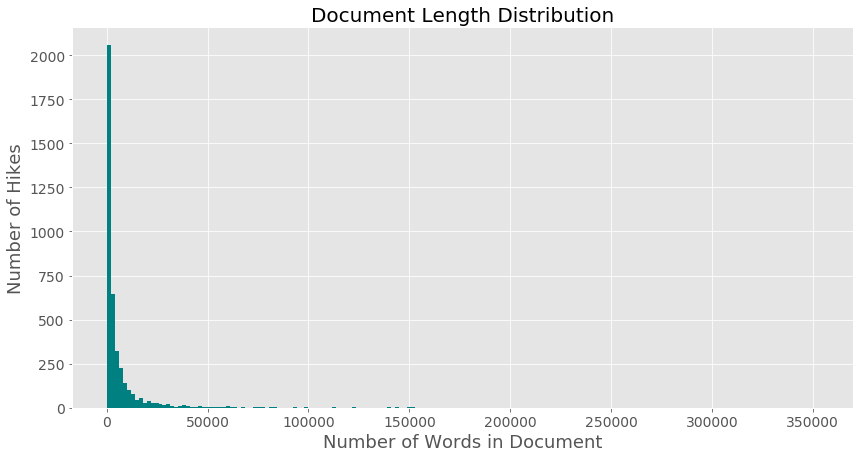

In [19]:
all_lengths=[len(df_corpus['all'][i]) for i in range(len(df_corpus))]
fig, ax = plt.subplots(1,1,figsize=(14,7))
ax.hist(all_lengths, bins=180, color='teal')
ax.set_title('Document Length Distribution', fontsize=20)
ax.set_xlabel('Number of Words in Document', fontsize=18)
ax.set_ylabel('Number of Hikes', fontsize=18)
plt.tick_params(labelsize=14)
# plt.savefig('images/document_dist.png', dpi=80);

In [20]:
punc = string.punctuation
stop = StopWords()
stop_words = stop.all_words
clean_column(df_corpus, 'all', punc)
X_tfidf, feats_tfidf, tfidf_vect = vectorize(df_corpus, 'all', stop_words, 6000)


In [21]:
df = pd.DataFrame(df_corpus['all'])
df.head()

,all
name,
Royal Arch Trail,dog friendly hiking nature trip snowshoeing ru...
Chavez and Beaver Brook Trail Loop,dog on leash hiking nature trip running forest...
Hanging Lake Trail [CLOSED],kid friendly hiking nature trip bird watching ...
Lost Lake via Hessie Trail,dog on leash backpacking camping hiking snowsh...
Mount Bierstadt Trail,dog on leash hiking nature trip lake river vie...


In [22]:
df_pretty, W_df, H_df = nmf_topic_modeling(df, X_tfidf, feats_tfidf, n_topics=10, n_words=10)

NameError: name 'get_nmf' is not defined